In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# warnings.filterwarnings('ignore')
plt.rcParams['figure.dpi'] = 80

import sys
sys.path.insert(0, '..')

import os
from pathlib import Path

from hypers import weight_hypers
from hypers import alpha_hypers 

from experiment import Params
from experiment import run_experiments
from experiment import load_experiments
from experiment import draw_logs
from experiment import experiments_to_df

from analysis import draw_several

### Эксперимент

In [2]:
dir = '../results/'
file = 'experim_00.json'

seeds = np.arange(3) + 101

params = Params(series_type = "default",
                from_start = False,
                a = -40,
                b = 40,
                dim = 10,
                low = -10,
                high = 10,
                clip = (-40, 40),
                workers_num = 3,
                length = 200,
                lower_bound = 10,
                upper_bound = 40,
                alternating=True)

different_noises = [1]
different_windows = [10]
different_wf = ["default", "simple_101"]
different_af = ["default", "simple_05"]


interesting = set()

for key_w in different_wf:
    interesting.add((key_w, "start", "default"))

for key_a in different_af:
    interesting.add(("simple_101", "start", key_a))


experiments, df = run_experiments(dir+file, seeds, params, different_noises, different_windows, interesting)
with open(dir + Path('info_' + file).with_suffix('').as_posix(), 'w') as f:
    f.write(_ih[2])
    
# experiments, df = load_experiments(dir+file)

100%|█████████████████████████████████████████████████████████████████████████████████████| 265/265 [00:00<00:00, 339.90it/s]


In [3]:
df

,noise_var,train_window,weight_function,mixing_type,alpha_function,mean,random_0,random_1,random_2
0,1,10,1 / ((x + 1) * (ln(x + 1))^2),start,1 / (x + 1),44089.08,36406.87,44874.52,50985.84
2,1,10,1 / (x^1.01),start,1 / (x + 1),32961.70,26336.51,36200.79,36347.81
1,1,10,1 / (x^1.01),start,1 / (x + 1)^0.5,33563.12,28424.79,34934.8,37329.76


In [4]:
# enumerated = [(num, experiment) for num, experiment in enumerate(experiments)]
# for num, experiment in enumerated[::7]:
#     draw_logs(experiment.logs, show=["master", "ideal"], title=f"Experiment №{num},  regret = {experiment.regret:.1f}", fig_size=(12, 5))

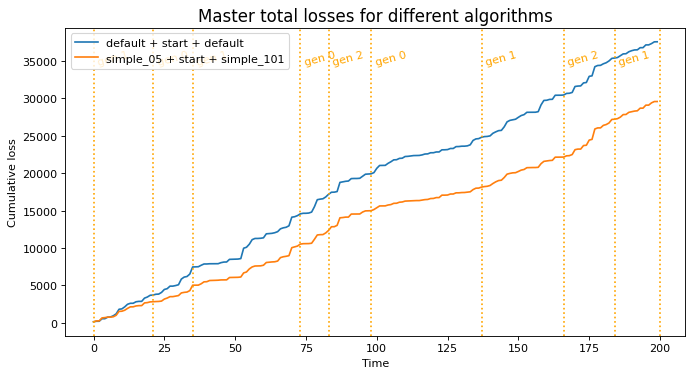

In [11]:
vital = experiments[:2]
anls = [experiment.logs for experiment in vital]
labels = [experiment.key_a + " + " + experiment.mixing_type + " + " + experiment.key_w for experiment in vital]
colors = [None] * 2
draw_several(logs=anls, labels=labels, colors=colors)

In [10]:
# df_w = df[df["alpha_function"] == alpha_hypers["default"].repr].iloc[:,:6]
# df_w

,noise_var,train_window,weight_function,mixing_type,alpha_function,mean
0,1,10,1 / ((x + 1) * (ln(x + 1))^2),start,1 / (x + 1),44089.08
2,1,10,1 / (x^1.01),start,1 / (x + 1),32961.70


In [7]:
# print(df_r.to_latex(index=False, float_format="%.2f"))
# df[["noise_var", "train_window", "regret"]].groupby(["noise_var", "train_window"]).mean()

64